### In this notebook we'll work on CNN network only, and fine-tune its' paremeters

In [ ]:
import tensorflow as tf
import utilities as ut
import importlib

In [2]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

In [7]:
RWF = ut.Preprocess("datasets/RWF-2000","datasets/RWF-2000 Dataframe")

In [9]:
RWF.dataframe(5)

Creating Directories: 100%|██████████| 1/1 [00:00<00:00, 999.12it/s]


Discovered 2000 Videos


Creating Directories: 100%|██████████| 1/1 [00:00<00:00, 1004.14it/s]


Discovered 0 Videos


Processing videos: 0it [00:00, ?it/s]


In [11]:
Movies = ut.Preprocess("datasets/Movies","datasets/Movies Dataframe")
Movies.dataframe(5)

Creating Directories: 100%|██████████| 1/1 [00:00<?, ?it/s]


Discovered 201 Videos


Processing videos:  35%|███▌      | 71/201 [00:13<00:25,  5.08it/s]

File already exists


#### Let's see what our image ranges are

In [12]:
RWF.image_ranges()

Dimensions range: (204.0, 360.0) / (400.0, 188.0) ---> (1920.0, 1080.0) / (1920.0, 1080.0) and average: (724.245, 445.33)


#### We'll try four different image sizes as input for our network and see which performs best

In [13]:
inp_shape1 = (160,160,3)
inp_shape2 = (240,240,3)
inp_shape3 = (360,360,3)
inp_shape4 = (480,480,3)

In [14]:
base_model_1 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=inp_shape1)
base_model_2 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=inp_shape2)
base_model_3 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=inp_shape3)
base_model_4 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=inp_shape4)

### Set our image data generators

In [17]:
train_dir_RWF = 'datasets/RWF-2000 Dataframe/train'
val_dir_RWF = 'datasets/RWF-2000 Dataframe/val'

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_data_160 = train_datagen.flow_from_directory(directory=train_dir_RWF,
                                                                            target_size=(160,160),
                                                                            class_mode="binary", 
                                                                            batch_size=32) 
test_data_160 = valid_datagen.flow_from_directory(directory=val_dir_RWF,
                                                                           target_size=(160,160),
                                                                           class_mode="binary")

train_data_240 = train_datagen.flow_from_directory(directory=train_dir_RWF,
                                                                            target_size=(240,240),
                                                                            class_mode="binary", 
                                                                            batch_size=32) 
test_data_240 = valid_datagen.flow_from_directory(directory=val_dir_RWF,
                                                                           target_size=(240,240),
                                                                           class_mode="binary")

train_data_360 = train_datagen.flow_from_directory(directory=train_dir_RWF,
                                                                            target_size=(360,360),
                                                                            class_mode="binary", 
                                                                            batch_size=32) 
test_data_360 = valid_datagen.flow_from_directory(directory=val_dir_RWF,
                                                                           target_size=(360,360),
                                                                           class_mode="binary")

train_data_480 = train_datagen.flow_from_directory(directory=train_dir_RWF,
                                                                            target_size=(480,480),
                                                                            class_mode="binary", 
                                                                            batch_size=32) 
test_data_480 = valid_datagen.flow_from_directory(directory=val_dir_RWF,
                                                                           target_size=(480,480),
                                                                           class_mode="binary")


Found 40000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.
Found 40000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.
Found 40000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.
Found 40000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [19]:
LR = 0.0001
MOMENTUM = 0.9
EPOCHS = 5

### Set all model's input/output layers 

In [20]:
base_model_1.trainable = False
pool = GlobalAveragePooling2D()(base_model_1.output)
output = Dense(2, activation = 'softmax')(pool)
model_1 = Model(inputs = base_model_1.input, outputs= output)
model_1.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = LR, momentum= MOMENTUM),metrics=['accuracy'])

base_model_2.trainable = False
pool = GlobalAveragePooling2D()(base_model_2.output)
output = Dense(2, activation = 'softmax')(pool)
model_2 = Model(inputs = base_model_2.input, outputs= output)
model_2.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = LR, momentum= MOMENTUM),metrics=['accuracy'])

base_model_3.trainable = False
pool = GlobalAveragePooling2D()(base_model_3.output)
output = Dense(2, activation = 'softmax')(pool)
model_3 = Model(inputs = base_model_3.input, outputs= output)
model_3.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = LR, momentum= MOMENTUM),metrics=['accuracy'])

base_model_4.trainable = False
pool = GlobalAveragePooling2D()(base_model_4.output)
output = Dense(2, activation = 'softmax')(pool)
model_4 = Model(inputs = base_model_4.input, outputs= output)
model_4.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = LR, momentum= MOMENTUM),metrics=['accuracy'])

c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


### Train each of the networks

In [21]:
history_1 = model_1.fit(train_data_160,epochs=EPOCHS,validation_data=test_data_160,verbose=1)

history_2 = model_2.fit(train_data_240,epochs=EPOCHS,validation_data=test_data_240,verbose=1)

history_3 = model_3.fit(train_data_360,epochs=EPOCHS,validation_data=test_data_360,verbose=1)

history_4 = model_4.fit(train_data_480,epochs=EPOCHS,validation_data=test_data_480,verbose=1)

Epoch 1/5
1250/1250 [==============================] - 377s 294ms/step - loss: 0.6055 - accuracy: 0.6927 - val_loss: 0.7200 - val_accuracy: 0.6202
Epoch 2/5
1250/1250 [==============================] - 353s 283ms/step - loss: 0.4722 - accuracy: 0.7735 - val_loss: 0.7760 - val_accuracy: 0.6138
Epoch 3/5
1250/1250 [==============================] - 290s 232ms/step - loss: 0.4293 - accuracy: 0.8002 - val_loss: 0.7132 - val_accuracy: 0.6402
Epoch 4/5
1250/1250 [==============================] - 292s 234ms/step - loss: 0.4039 - accuracy: 0.8160 - val_loss: 0.7413 - val_accuracy: 0.6377
Epoch 5/5
1250/1250 [==============================] - 284s 227ms/step - loss: 0.3855 - accuracy: 0.8286 - val_loss: 0.7414 - val_accuracy: 0.6393
Epoch 1/5
1250/1250 [==============================] - 374s 295ms/step - loss: 0.5904 - accuracy: 0.6802 - val_loss: 0.5742 - val_accuracy: 0.7088
Epoch 2/5
1250/1250 [==============================] - 381s 305ms/step - loss: 0.4996 - accuracy: 0.7472 - val_loss: 0

## Make function to visualize the diffences in training

In [36]:
import matplotlib.pyplot as plt

def compare_training_histories(histories,labels):
    # Set up the subplots
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

    # Plot the accuracy
    axs[0, 0].set_title('Training Accuracy')
    axs[0, 0].plot(histories[0].history['accuracy'], label=labels[0])
    axs[0, 0].plot(histories[1].history['accuracy'], label=labels[1])
    axs[0, 0].plot(histories[2].history['accuracy'], label=labels[2])
    axs[0, 0].plot(histories[3].history['accuracy'], label=labels[3])
    axs[0, 0].legend()

    # Plot the loss
    axs[0, 1].set_title('Training Loss')
    axs[0, 1].plot(histories[0].history['loss'], label=labels[0])
    axs[0, 1].plot(histories[1].history['loss'], label=labels[1])
    axs[0, 1].plot(histories[2].history['loss'], label=labels[2])
    axs[0, 1].plot(histories[3].history['loss'], label=labels[3])
    axs[0, 1].legend()

    # Plot the validation accuracy
    axs[1, 0].set_title('Validation Accuracy')
    axs[1, 0].plot(histories[0].history['val_accuracy'], label=labels[0])
    axs[1, 0].plot(histories[1].history['val_accuracy'], label=labels[1])
    axs[1, 0].plot(histories[2].history['val_accuracy'], label=labels[2])
    axs[1, 0].plot(histories[3].history['val_accuracy'], label=labels[3])
    axs[1, 0].legend()

    # Plot the validation loss
    axs[1, 1].set_title('Validation Loss')
    axs[1, 1].plot(histories[0].history['val_loss'], label=labels[0])
    axs[1, 1].plot(histories[1].history['val_loss'], label=labels[1])
    axs[1, 1].plot(histories[2].history['val_loss'], label=labels[2])
    axs[1, 1].plot(histories[3].history['val_loss'], label=labels[3])
    axs[1, 1].legend()

    # Show the plot
    plt.show()

In [41]:
histories = [history_1,history_2,history_3,history_4]
labels = ["Input Size: 160x160","Input Size: 240x240","Input Size: 360x360","Input Size: 480x480"]

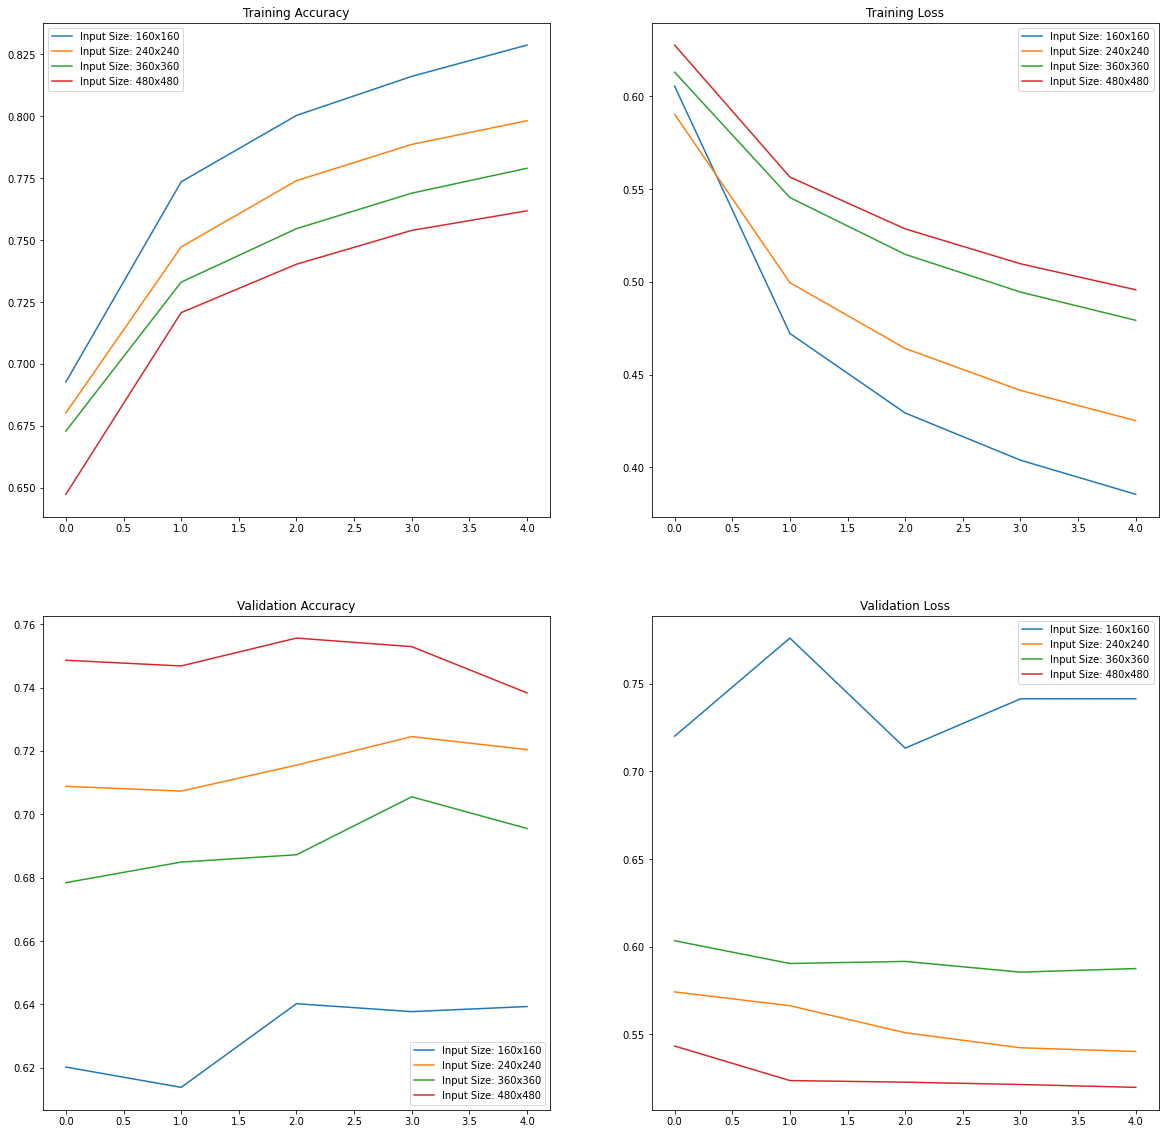

In [42]:
compare_training_histories(histories,labels)

## Data Augmentation

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,brightness_range=[0.7,1.3],zoom_range=0.8)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [54]:
train_data_240 = train_datagen.flow_from_directory(directory=train_dir_RWF,
                                                                            target_size=(240,240),
                                                                            class_mode="binary", 
                                                                            batch_size=32) 
test_data_240 = valid_datagen.flow_from_directory(directory=val_dir_RWF,
                                                                           target_size=(240,240),
                                                                           class_mode="binary")

Found 40000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [55]:
base_model_5 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=(240,240,3))
base_model_5.trainable = False
pool = GlobalAveragePooling2D()(base_model_5.output)
output = Dense(2, activation = 'softmax')(pool)
model_5 = Model(inputs = base_model_5.input, outputs= output)
model_5.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = LR, momentum= MOMENTUM),metrics=['accuracy'])

c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [56]:
history_5 = model_5.fit(train_data_240,epochs=20,validation_data=test_data_240,verbose=1)

Epoch 1/20
1250/1250 [==============================] - 849s 676ms/step - loss: 0.6477 - accuracy: 0.6330 - val_loss: 0.5940 - val_accuracy: 0.6820
Epoch 2/20
1250/1250 [==============================] - 745s 596ms/step - loss: 0.5900 - accuracy: 0.6830 - val_loss: 0.5693 - val_accuracy: 0.6961
Epoch 3/20
1250/1250 [==============================] - 727s 582ms/step - loss: 0.5658 - accuracy: 0.7018 - val_loss: 0.5640 - val_accuracy: 0.7031
Epoch 4/20
1250/1250 [==============================] - 739s 591ms/step - loss: 0.5562 - accuracy: 0.7092 - val_loss: 0.5614 - val_accuracy: 0.7012
Epoch 5/20
1250/1250 [==============================] - 731s 584ms/step - loss: 0.5445 - accuracy: 0.7182 - val_loss: 0.5751 - val_accuracy: 0.6913
Epoch 6/20
1250/1250 [==============================] - 730s 584ms/step - loss: 0.5402 - accuracy: 0.7193 - val_loss: 0.5565 - val_accuracy: 0.7022
Epoch 7/20
1250/1250 [==============================] - 733s 587ms/step - loss: 0.5387 - accuracy: 0.7231 - val_

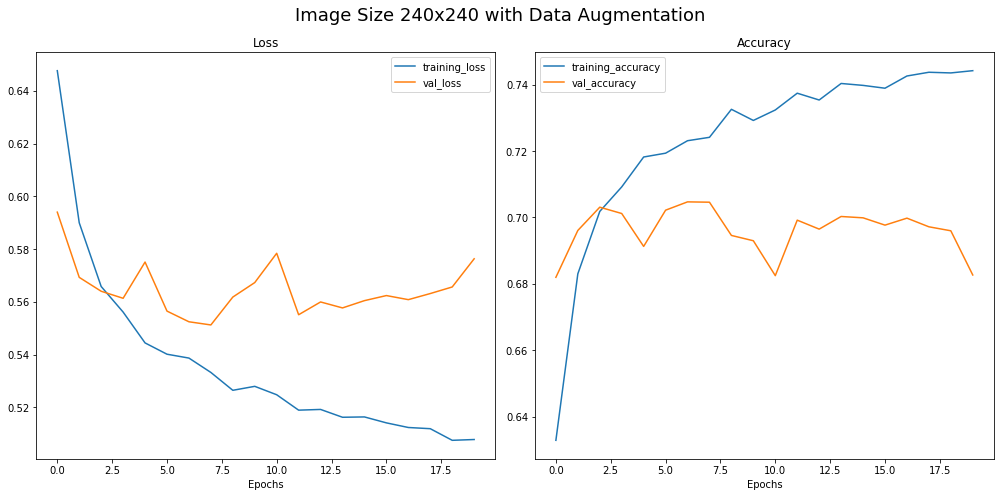

In [57]:
ut.Visualize.plot_loss_curves([history_5],["Image Size 240x240 with Data Augmentation"])

### Starting Fine-Tuning
Here we are going to test the effects of fine-tuning by gradually opening up more layers and lowering the learning rate

In [63]:
base_model_6 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=(240,240,3))
base_model_6.trainable = False
pool = GlobalAveragePooling2D()(base_model_6.output)
output = Dense(2, activation = 'softmax')(pool)
model_6 = Model(inputs = base_model_6.input, outputs= output)
model_6.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = LR, momentum= MOMENTUM),metrics=['accuracy'])
#Train for 1 epoch all frozen
history_6_1 = model_6.fit(train_data_240,epochs=2,validation_data=test_data_240,verbose=1)
print("Finished Training with all parameteres frozen")

#Unfreeze last 10 layers train for 5 epochs
base_model_6.trainable = True
for layer in base_model_6.layers[:-10]:
  layer.trainable = False
model_6.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = 0.1*LR, momentum= MOMENTUM),metrics=['accuracy'])
history_6_2 = model_6.fit(train_data_240,epochs=4,validation_data=test_data_240,verbose=1)
print("Finished Training with last 10 layers unfrozen")

#Unfreeze last 40 layers train for 5 epochs
base_model_6.trainable = True
for layer in base_model_6.layers[:-40]:
  layer.trainable = False
model_6.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = 0.01*LR, momentum= MOMENTUM),metrics=['accuracy'])
history_6_3 = model_6.fit(train_data_240,epochs=8,validation_data=test_data_240,verbose=1)
print("Finished Training with last 40 layers unfrozen")

Epoch 1/2
1250/1250 [==============================] - 1055s 840ms/step - loss: 0.6547 - accuracy: 0.6277 - val_loss: 0.5988 - val_accuracy: 0.6929
Epoch 2/2
1250/1250 [==============================] - 1081s 864ms/step - loss: 0.5859 - accuracy: 0.6858 - val_loss: 0.5761 - val_accuracy: 0.7001
Finished Training with all parameteres frozen
Epoch 1/4
1250/1250 [==============================] - 1118s 890ms/step - loss: 0.5772 - accuracy: 0.6922 - val_loss: 0.5798 - val_accuracy: 0.6914
Epoch 2/4
1250/1250 [==============================] - 877s 702ms/step - loss: 0.5764 - accuracy: 0.6934 - val_loss: 0.5819 - val_accuracy: 0.6904
Epoch 3/4
1250/1250 [==============================] - 811s 649ms/step - loss: 0.5710 - accuracy: 0.6988 - val_loss: 0.5761 - val_accuracy: 0.6950
Epoch 4/4
1250/1250 [==============================] - 811s 648ms/step - loss: 0.5684 - accuracy: 0.6996 - val_loss: 0.5749 - val_accuracy: 0.6952
Finished Training with last 10 layers unfrozen
Epoch 1/8
1250/1250 [=

In [64]:
base_model_7 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=(240,240,3))
base_model_7.trainable = True
pool = GlobalAveragePooling2D()(base_model_7.output)
output = Dense(2, activation = 'softmax')(pool)
model_7 = Model(inputs = base_model_7.input, outputs= output)
model_7.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = LR, momentum= MOMENTUM),metrics=['accuracy'])
#Train for 1 epoch all frozen
history_7 = model_7.fit(train_data_240,epochs=2,validation_data=test_data_240,verbose=1)
print("Finished Training with all parameteres unfrozen")

c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/2
1250/1250 [==============================] - 1122s 890ms/step - loss: 0.5723 - accuracy: 0.6902 - val_loss: 0.5059 - val_accuracy: 0.7386
Epoch 2/2
1250/1250 [==============================] - 1081s 865ms/step - loss: 0.4536 - accuracy: 0.7796 - val_loss: 0.4997 - val_accuracy: 0.7552
Finished Training with all parameteres unfrozen


In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,brightness_range=[0.5,1.5],zoom_range=0.6,rotation_range=30)
valid_datagen = ImageDataGenerator(rescale=1./255)
train_data_240 = train_datagen.flow_from_directory(directory=train_dir_RWF,
                                                                            target_size=(240,240),
                                                                            class_mode="binary", 
                                                                            batch_size=32) 
test_data_240 = valid_datagen.flow_from_directory(directory=val_dir_RWF,
                                                                           target_size=(240,240),
                                                                           class_mode="binary")
history_7_2 = model_7.fit(train_data_240,epochs=4,validation_data=test_data_240,verbose=1)
print("Finished Training with all parameteres unfrozen more data augmentation")

Found 40000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.
Epoch 1/4
1250/1250 [==============================] - 1027s 821ms/step - loss: 0.4158 - accuracy: 0.8047 - val_loss: 0.5237 - val_accuracy: 0.7342
Epoch 2/4
1250/1250 [==============================] - 1106s 884ms/step - loss: 0.3553 - accuracy: 0.8409 - val_loss: 0.5347 - val_accuracy: 0.7382
Epoch 3/4
1250/1250 [==============================] - 1136s 909ms/step - loss: 0.3140 - accuracy: 0.8620 - val_loss: 0.5370 - val_accuracy: 0.7414
Epoch 4/4
1250/1250 [==============================] - 1120s 896ms/step - loss: 0.2810 - accuracy: 0.8795 - val_loss: 0.5707 - val_accuracy: 0.7322
Finished Training with all parameteres unfrozen more data augmentation


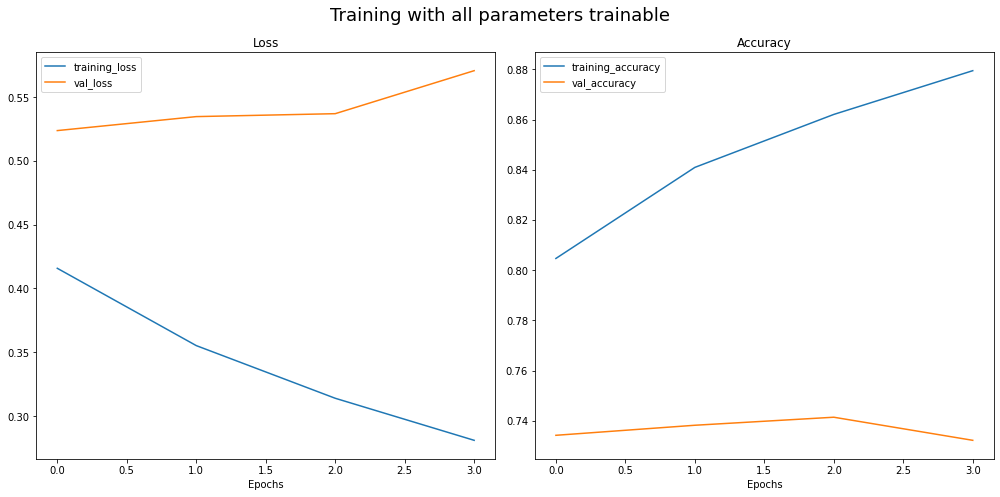

In [67]:
ut.Visualize.plot_loss_curves([history_7_2],["Training with all parameters trainable"])

In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,brightness_range=[0.8,1.5],zoom_range=0.8,rotation_range=10)
valid_datagen = ImageDataGenerator(rescale=1./255)
train_data_240 = train_datagen.flow_from_directory(directory=train_dir_RWF,
                                                                            target_size=(240,240),
                                                                            class_mode="binary", 
                                                                            batch_size=32) 
test_data_240 = valid_datagen.flow_from_directory(directory=val_dir_RWF,
                                                                           target_size=(240,240),
                                                                           class_mode="binary")
                                                                        
base_model_8 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=(240,240,3))
base_model_8.trainable = True
pool = GlobalAveragePooling2D()(base_model_8.output)
output = Dense(2, activation = 'softmax')(pool)
model_8 = Model(inputs = base_model_8.input, outputs= output)
model_8.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = LR, momentum= 0.7),metrics=['accuracy'])
#Train for 1 epoch all frozen
history_8 = model_8.fit(train_data_240,epochs=6,validation_data=test_data_240,verbose=1)
print("Finished Training with all parameteres unfrozen more data augmentation")

Found 40000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/6
1250/1250 [==============================] - 832s 660ms/step - loss: 0.6463 - accuracy: 0.6226 - val_loss: 0.5998 - val_accuracy: 0.6805
Epoch 2/6
1250/1250 [==============================] - 878s 702ms/step - loss: 0.5712 - accuracy: 0.6980 - val_loss: 0.5768 - val_accuracy: 0.6969
Epoch 3/6
1250/1250 [==============================] - 885s 708ms/step - loss: 0.5278 - accuracy: 0.7312 - val_loss: 0.5546 - val_accuracy: 0.7090
Epoch 4/6
1250/1250 [==============================] - 934s 747ms/step - loss: 0.4955 - accuracy: 0.7544 - val_loss: 0.5461 - val_accuracy: 0.7140
Epoch 5/6
1250/1250 [==============================] - 952s 762ms/step - loss: 0.4710 - accuracy: 0.7718 - val_loss: 0.5417 - val_accuracy: 0.7216
Epoch 6/6
1250/1250 [==============================] - 966s 772ms/step - loss: 0.4468 - accuracy: 0.7873 - val_loss: 0.5410 - val_accuracy: 0.7240
Finished Training with all parameteres unfrozen more data augmentation


In [70]:
from tensorflow.keras.callbacks import EarlyStopping
train_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,brightness_range=[0.8,1.5],zoom_range=0.8)
valid_datagen = ImageDataGenerator(rescale=1./255)
train_data_240 = train_datagen.flow_from_directory(directory=train_dir_RWF,
                                                                            target_size=(240,240),
                                                                            class_mode="binary", 
                                                                            batch_size=32) 
test_data_240 = valid_datagen.flow_from_directory(directory=val_dir_RWF,
                                                                           target_size=(240,240),
                                                                           class_mode="binary")
#Set Callback to stop early
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True) 

#Use Nesterov Accelerated Gradient
optimizer_1 = optimizers.SGD(lr = LR, momentum= MOMENTUM, nesterov=True)

base_model_9 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=(240,240,3))
base_model_9.trainable = True
pool = GlobalAveragePooling2D()(base_model_9.output)
output = Dense(2, activation = 'softmax')(pool)
model_9 = Model(inputs = base_model_9.input, outputs= output)
model_9.compile(loss='sparse_categorical_crossentropy', optimizer= optimizer_1,metrics=['accuracy'])
#Train for 1 epoch all frozen
history_9 = model_9.fit(train_data_240,epochs=20,validation_data=test_data_240,callbacks=[early_stopping],verbose=1)
print("Finished Training with all parameteres unfrozen with Nesterov for 20 Epochs")

base_model_10 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=(240,240,3))
base_model_10.trainable = True
pool2 = GlobalAveragePooling2D()(base_model_10.output)
output2 = Dense(2, activation = 'softmax')(pool2)
model_10 = Model(inputs = base_model_10.input, outputs= output2)
model_10.compile(loss='sparse_categorical_crossentropy', optimizer= 'adam',metrics=['accuracy'])
#Train for 1 epoch all frozen
history_10 = model_10.fit(train_data_240,epochs=20,validation_data=test_data_240,callbacks=[early_stopping],verbose=1)
print("Finished Training with all parameteres unfrozen with Adam optimizer")

Found 40000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
1250/1250 [==============================] - 1020s 811ms/step - loss: 0.5746 - accuracy: 0.6931 - val_loss: 0.5363 - val_accuracy: 0.6963
Epoch 2/20
1250/1250 [==============================] - 1089s 871ms/step - loss: 0.4609 - accuracy: 0.7758 - val_loss: 0.5014 - val_accuracy: 0.7306
Epoch 3/20
1250/1250 [==============================] - 1020s 816ms/step - loss: 0.3966 - accuracy: 0.8162 - val_loss: 0.4956 - val_accuracy: 0.7425
Epoch 4/20
1250/1250 [==============================] - 1049s 839ms/step - loss: 0.3507 - accuracy: 0.8404 - val_loss: 0.4964 - val_accuracy: 0.7520
Epoch 5/20
1250/1250 [==============================] - 992s 793ms/step - loss: 0.3091 - accuracy: 0.8622 - val_loss: 0.5398 - val_accuracy: 0.7320
Epoch 6/20
1250/1250 [==============================] - 984s 787ms/step - loss: 0.2830 - accuracy: 0.8765 - val_loss: 0.5308 - val_accuracy: 0.7435
Epoch 7/20
1250/1250 [==============================] - 981s 784ms/step - loss: 0.2569 - accuracy: 0.8887 - 

In [ ]:
import callbacks as cb
timetaken = cb.timecallback()
callbacks = [cb.Callbacks.checkpoint_callback(),timetaken]

Epoch 1/5
301/301 [==============================] - ETA: 0s - loss: 0.6700 - accuracy: 0.5970
Epoch 1: saving model to Checkpoints\checkpoint.ckpt
301/301 [==============================] - 85s 283ms/step - loss: 0.6700 - accuracy: 0.5970 - val_loss: 0.6166 - val_accuracy: 0.6712
Epoch 2/5
301/301 [==============================] - ETA: 0s - loss: 0.6062 - accuracy: 0.6738
Epoch 2: saving model to Checkpoints\checkpoint.ckpt
301/301 [==============================] - 83s 276ms/step - loss: 0.6062 - accuracy: 0.6738 - val_loss: 0.5859 - val_accuracy: 0.6946
Epoch 3/5
301/301 [==============================] - ETA: 0s - loss: 0.5735 - accuracy: 0.6990
Epoch 3: saving model to Checkpoints\checkpoint.ckpt
301/301 [==============================] - 98s 325ms/step - loss: 0.5735 - accuracy: 0.6990 - val_loss: 0.5816 - val_accuracy: 0.6858
Epoch 4/5
301/301 [==============================] - ETA: 0s - loss: 0.5521 - accuracy: 0.7159
Epoch 4: saving model to Checkpoints\checkpoint.ckpt
301/30

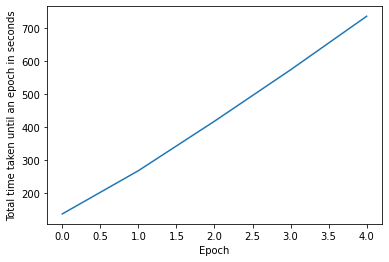

Epoch  0  run time is:  137.125
Epoch  1  run time is:  131.1875
Epoch  2  run time is:  150.09375
Epoch  3  run time is:  155.9375
Epoch  4  run time is:  162.59375
Total trained time is:  736.9375


In [77]:
history_5 = model_5.fit(train_data_299,epochs=EPOCHS,callbacks=callbacks,validation_data=test_data_299,verbose=1)

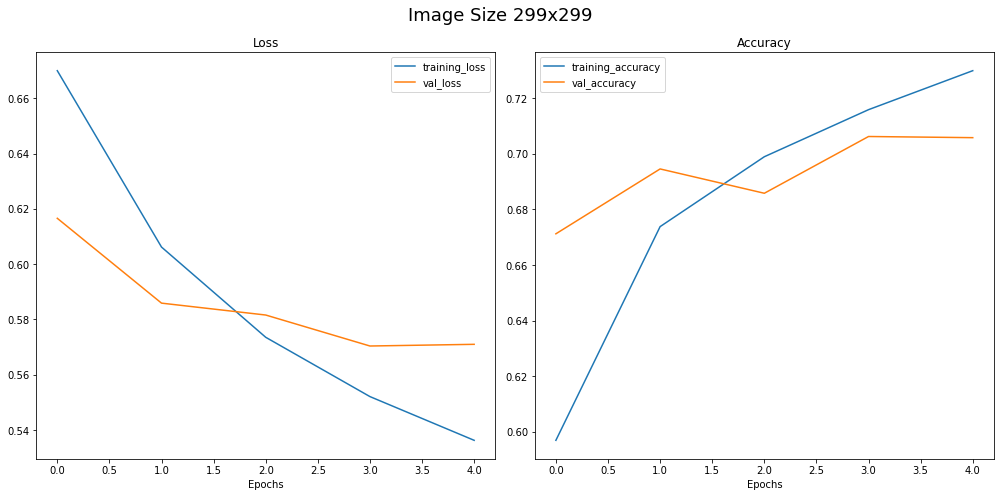

In [78]:
ut.Visualize.plot_loss_curves([history_5],["Image Size 299x299"])

### We see good compromise between training time and accuracy
However the network is...
We'll see with a bigger dataset

In [79]:
train_dir_RWF_big = 'RWF-2000 Dataframe/train'
val_dir_RWF_big = 'RWF-2000 Dataframe/val'
train_data_big_299 = train_datagen.flow_from_directory(directory=train_dir_RWF_big,
                                                                            target_size=(299,299),
                                                                            class_mode="binary", 
                                                                            batch_size=32) 
test_data_big_299 = valid_datagen.flow_from_directory(directory=val_dir_RWF_big,
                                                                           target_size=(299,299),
                                                                           class_mode="binary")

base_model_6 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=(299,299,3))
base_model_6.trainable = False
pool = GlobalAveragePooling2D()(base_model_6.output)
output = Dense(2, activation = 'softmax')(pool)
model_6 = Model(inputs = base_model_6.input, outputs= output)
model_6.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = LR, momentum= MOMENTUM),metrics=['accuracy'])

Found 79997 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
2500/2500 [==============================] - ETA: 0s - loss: 0.5582 - accuracy: 0.7120
Epoch 1: saving model to Checkpoints\checkpoint.ckpt
2500/2500 [==============================] - 970s 387ms/step - loss: 0.5582 - accuracy: 0.7120 - val_loss: 0.5800 - val_accuracy: 0.7051
Epoch 2/5
2500/2500 [==============================] - ETA: 0s - loss: 0.4697 - accuracy: 0.7779
Epoch 2: saving model to Checkpoints\checkpoint.ckpt
2500/2500 [==============================] - 1144s 457ms/step - loss: 0.4697 - accuracy: 0.7779 - val_loss: 0.5814 - val_accuracy: 0.7099
Epoch 3/5
2500/2500 [==============================] - ETA: 0s - loss: 0.4376 - accuracy: 0.7985
Epoch 3: saving model to Checkpoints\checkpoint.ckpt
2500/2500 [==============================] - 1272s 509ms/step - loss: 0.4376 - accuracy: 0.7985 - val_loss: 0.5822 - val_accuracy: 0.7156
Epoch 4/5
2500/2500 [==============================] - ETA: 0s - loss: 0.4169 - accuracy: 0.8113
Epoch 4: saving model to Checkpoints\che

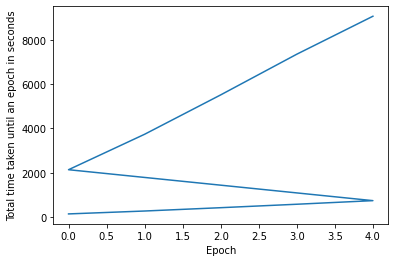

Epoch  0  run time is:  137.125
Epoch  1  run time is:  131.1875
Epoch  2  run time is:  150.09375
Epoch  3  run time is:  155.9375
Epoch  4  run time is:  162.59375
Epoch  0  run time is:  1397.75
Epoch  1  run time is:  1602.140625
Epoch  2  run time is:  1779.5
Epoch  3  run time is:  1838.375
Epoch  4  run time is:  1714.59375
Total trained time is:  9069.296875


In [80]:
history_6 = model_6.fit(train_data_big_299,epochs=EPOCHS,callbacks=callbacks,validation_data=test_data_big_299,verbose=1)

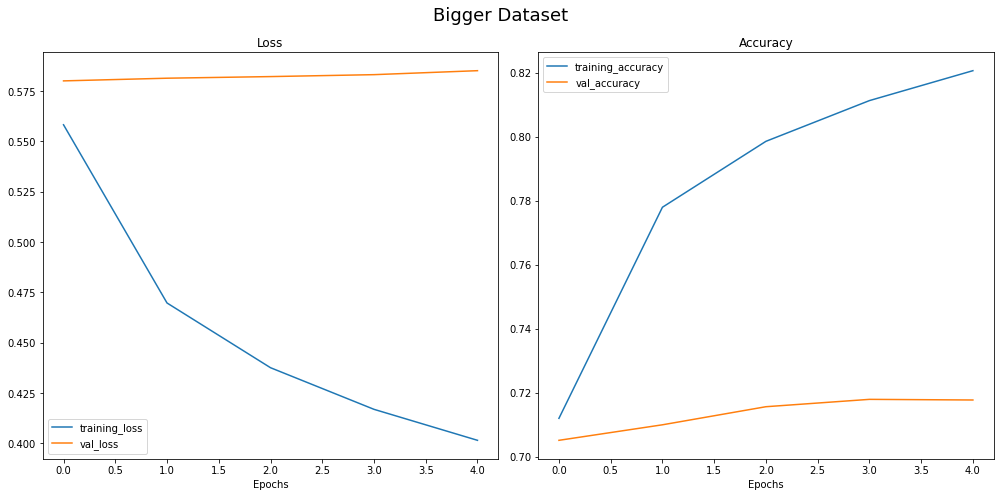

In [81]:
ut.Visualize.plot_loss_curves([history_6],["Bigger Dataset"])

#### Better results but network isn't learning any more
We seem to be stuck at the 72% accuracy

In [82]:
base_model_7 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=(299,299,3))
base_model_7.trainable = False
pool = GlobalAveragePooling2D()(base_model_7.output)
output = Dense(2, activation = 'softmax')(pool)
model_7 = Model(inputs = base_model_7.input, outputs= output)
model_7.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = LR),metrics=['accuracy'])

c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
301/301 [==============================] - 86s 269ms/step - loss: 0.7334 - accuracy: 0.4949 - val_loss: 0.6988 - val_accuracy: 0.5467
Epoch 2/5
301/301 [==============================] - 77s 257ms/step - loss: 0.7130 - accuracy: 0.5272 - val_loss: 0.6842 - val_accuracy: 0.5733
Epoch 3/5
301/301 [==============================] - 83s 274ms/step - loss: 0.6975 - accuracy: 0.5468 - val_loss: 0.6727 - val_accuracy: 0.5879
Epoch 4/5
301/301 [==============================] - 81s 268ms/step - loss: 0.6842 - accuracy: 0.5691 - val_loss: 0.6623 - val_accuracy: 0.6062
Epoch 5/5
301/301 [==============================] - 82s 271ms/step - loss: 0.6727 - accuracy: 0.5891 - val_loss: 0.6536 - val_accuracy: 0.6179


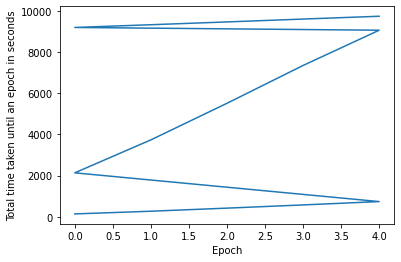

Epoch  0  run time is:  137.125
Epoch  1  run time is:  131.1875
Epoch  2  run time is:  150.09375
Epoch  3  run time is:  155.9375
Epoch  4  run time is:  162.59375
Epoch  0  run time is:  1397.75
Epoch  1  run time is:  1602.140625
Epoch  2  run time is:  1779.5
Epoch  3  run time is:  1838.375
Epoch  4  run time is:  1714.59375
Epoch  0  run time is:  133.734375
Epoch  1  run time is:  132.96875
Epoch  2  run time is:  136.21875
Epoch  3  run time is:  139.453125
Epoch  4  run time is:  137.15625
Total trained time is:  9748.828125


In [83]:
history_7 = model_7.fit(train_data_299,epochs=EPOCHS,callbacks=[timetaken],validation_data=test_data_299,verbose=1)

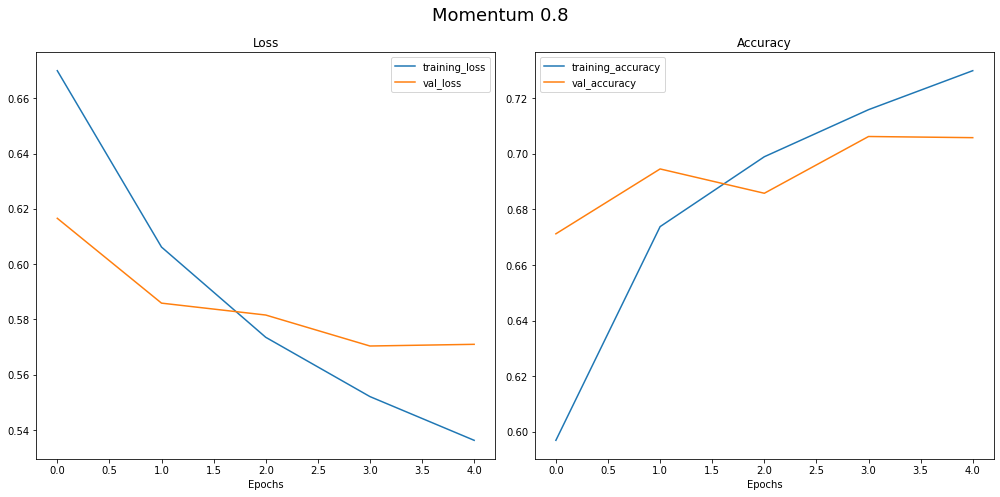

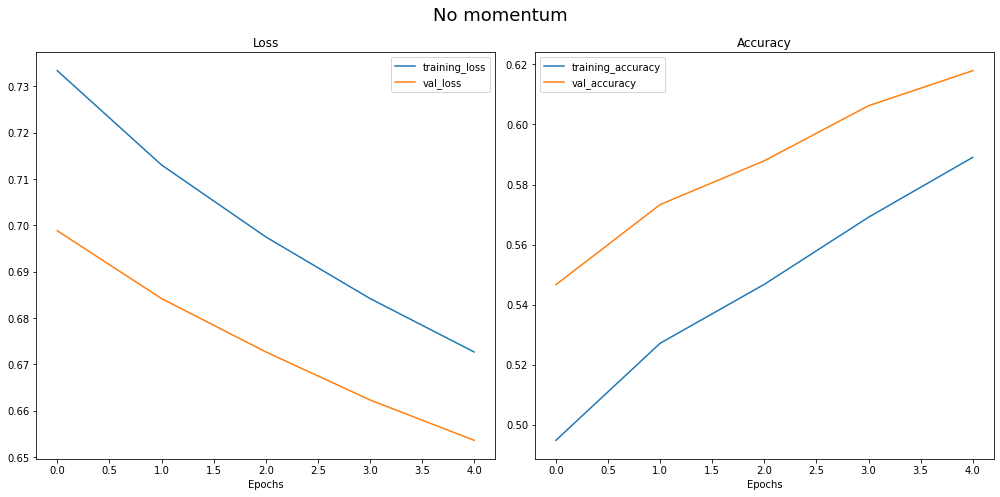

In [85]:
ut.Visualize.plot_loss_curves([history_5],["Momentum 0.8"])
ut.Visualize.plot_loss_curves([history_7],["No momentum"])

### The network isn't learning as fast
Let's see what happens if we train for longer

In [86]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss',patience=2)]
base_model_8 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=(299,299,3))
base_model_8.trainable = False
pool = GlobalAveragePooling2D()(base_model_8.output)
output = Dense(2, activation = 'softmax')(pool)
model_8 = Model(inputs = base_model_8.input, outputs= output)
model_8.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = LR),metrics=['accuracy'])

c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [88]:
history_8 = model_8.fit(train_data_299,epochs=15,callbacks=callbacks,validation_data=test_data_299,verbose=1)

Epoch 1/15
301/301 [==============================] - 76s 250ms/step - loss: 0.7178 - accuracy: 0.5364 - val_loss: 0.7078 - val_accuracy: 0.5433
Epoch 2/15
301/301 [==============================] - 76s 252ms/step - loss: 0.6989 - accuracy: 0.5599 - val_loss: 0.6882 - val_accuracy: 0.5642
Epoch 3/15
301/301 [==============================] - 77s 254ms/step - loss: 0.6827 - accuracy: 0.5789 - val_loss: 0.6713 - val_accuracy: 0.5863
Epoch 4/15
301/301 [==============================] - 77s 254ms/step - loss: 0.6690 - accuracy: 0.5977 - val_loss: 0.6608 - val_accuracy: 0.6025
Epoch 5/15
301/301 [==============================] - 78s 259ms/step - loss: 0.6572 - accuracy: 0.6151 - val_loss: 0.6475 - val_accuracy: 0.6275
Epoch 6/15
301/301 [==============================] - 78s 260ms/step - loss: 0.6468 - accuracy: 0.6293 - val_loss: 0.6358 - val_accuracy: 0.6471
Epoch 7/15
301/301 [==============================] - 80s 265ms/step - loss: 0.6378 - accuracy: 0.6426 - val_loss: 0.6275 - val_ac

In [89]:
#Train for longer
history_8_2 = model_8.fit(train_data_299,epochs=20,callbacks=callbacks,validation_data=test_data_299,verbose=1)

Epoch 1/20
301/301 [==============================] - 88s 292ms/step - loss: 0.5868 - accuracy: 0.6910 - val_loss: 0.5822 - val_accuracy: 0.6979
Epoch 2/20
301/301 [==============================] - 93s 309ms/step - loss: 0.5830 - accuracy: 0.6941 - val_loss: 0.5812 - val_accuracy: 0.6950
Epoch 3/20
301/301 [==============================] - 104s 347ms/step - loss: 0.5794 - accuracy: 0.6965 - val_loss: 0.5770 - val_accuracy: 0.7067
Epoch 4/20
301/301 [==============================] - 105s 349ms/step - loss: 0.5760 - accuracy: 0.6978 - val_loss: 0.5744 - val_accuracy: 0.7121
Epoch 5/20
301/301 [==============================] - 100s 333ms/step - loss: 0.5731 - accuracy: 0.7027 - val_loss: 0.5743 - val_accuracy: 0.7017
Epoch 6/20
301/301 [==============================] - 110s 364ms/step - loss: 0.5701 - accuracy: 0.7048 - val_loss: 0.5717 - val_accuracy: 0.7058
Epoch 7/20
301/301 [==============================] - 96s 319ms/step - loss: 0.5673 - accuracy: 0.7057 - val_loss: 0.5709 - va

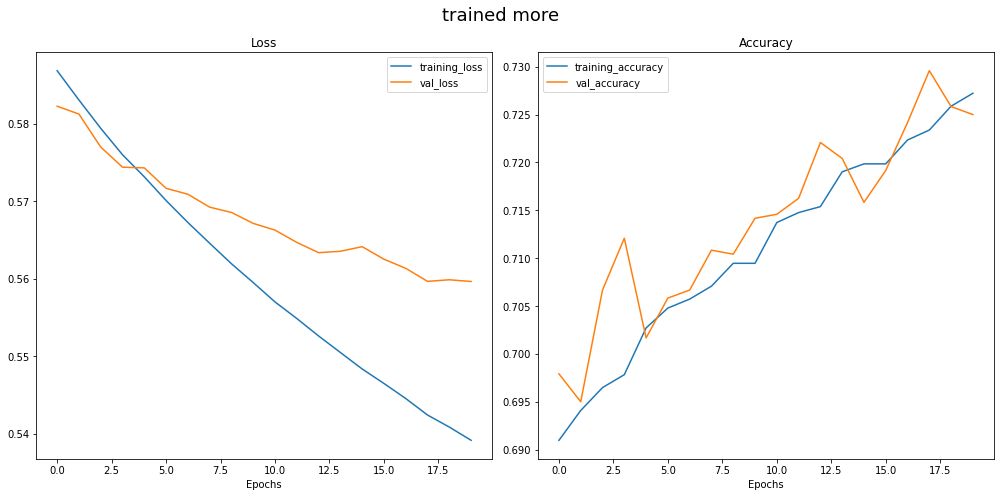

In [92]:
ut.Visualize.plot_loss_curves([history_8_2],["trained more"])

In [93]:
# Unfreeze all of the layers in the base model
base_model_8.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model_8.layers[:-10]:
  layer.trainable = False

In [94]:
model_8.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = 0.1*LR),metrics=['accuracy'])
for layer in model_8.layers:
  print(layer.name, layer.trainable)

input_13 False
conv2d_1128 False
batch_normalization_1128 False
activation_1128 False
conv2d_1129 False
batch_normalization_1129 False
activation_1129 False
conv2d_1130 False
batch_normalization_1130 False
activation_1130 False
max_pooling2d_48 False
conv2d_1131 False
batch_normalization_1131 False
activation_1131 False
conv2d_1132 False
batch_normalization_1132 False
activation_1132 False
max_pooling2d_49 False
conv2d_1136 False
batch_normalization_1136 False
activation_1136 False
conv2d_1134 False
conv2d_1137 False
batch_normalization_1134 False
batch_normalization_1137 False
activation_1134 False
activation_1137 False
average_pooling2d_108 False
conv2d_1133 False
conv2d_1135 False
conv2d_1138 False
conv2d_1139 False
batch_normalization_1133 False
batch_normalization_1135 False
batch_normalization_1138 False
batch_normalization_1139 False
activation_1133 False
activation_1135 False
activation_1138 False
activation_1139 False
mixed0 False
conv2d_1143 False
batch_normalization_1143 Fal

c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [95]:
history_8_3 = model_8.fit(train_data_299,epochs=20,callbacks=callbacks,validation_data=test_data_299,verbose=1)

Epoch 1/20
301/301 [==============================] - 99s 313ms/step - loss: 0.5418 - accuracy: 0.7219 - val_loss: 0.5642 - val_accuracy: 0.7158
Epoch 2/20
301/301 [==============================] - 87s 288ms/step - loss: 0.5416 - accuracy: 0.7239 - val_loss: 0.5639 - val_accuracy: 0.7171
Epoch 3/20
301/301 [==============================] - 102s 338ms/step - loss: 0.5412 - accuracy: 0.7247 - val_loss: 0.5634 - val_accuracy: 0.7192
Epoch 4/20
301/301 [==============================] - 85s 283ms/step - loss: 0.5413 - accuracy: 0.7259 - val_loss: 0.5630 - val_accuracy: 0.7212
Epoch 5/20
301/301 [==============================] - 79s 261ms/step - loss: 0.5408 - accuracy: 0.7269 - val_loss: 0.5628 - val_accuracy: 0.7208
Epoch 6/20
301/301 [==============================] - 79s 263ms/step - loss: 0.5406 - accuracy: 0.7289 - val_loss: 0.5627 - val_accuracy: 0.7208
Epoch 7/20
301/301 [==============================] - 80s 267ms/step - loss: 0.5404 - accuracy: 0.7273 - val_loss: 0.5626 - val_a

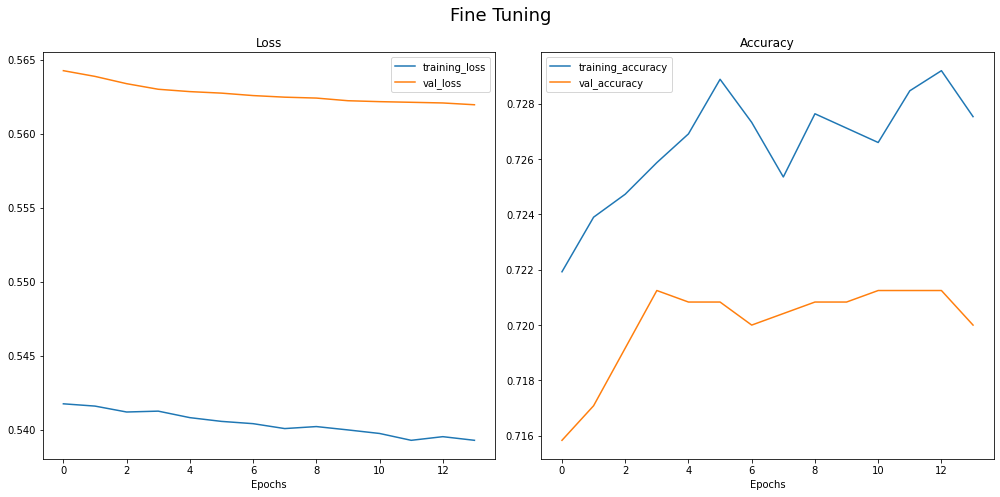

In [96]:
ut.Visualize.plot_loss_curves([history_8_3],["Fine Tuning"])

In [97]:
# Unfreeze all of the layers in the base model
base_model_8.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model_8.layers[:-15]:
  layer.trainable = False

model_8.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = LR),metrics=['accuracy'])
history_8_3 = model_8.fit(train_data_299,epochs=5,callbacks=callbacks,validation_data=test_data_299,verbose=1)

c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
301/301 [==============================] - 85s 267ms/step - loss: 0.5564 - accuracy: 0.7219 - val_loss: 0.5620 - val_accuracy: 0.7304
Epoch 2/5
301/301 [==============================] - 80s 267ms/step - loss: 0.5520 - accuracy: 0.7314 - val_loss: 0.5611 - val_accuracy: 0.7296
Epoch 3/5
301/301 [==============================] - 88s 293ms/step - loss: 0.5483 - accuracy: 0.7280 - val_loss: 0.5586 - val_accuracy: 0.7350
Epoch 4/5
301/301 [==============================] - 83s 275ms/step - loss: 0.5464 - accuracy: 0.7334 - val_loss: 0.5574 - val_accuracy: 0.7321
Epoch 5/5
301/301 [==============================] - 86s 286ms/step - loss: 0.5443 - accuracy: 0.7339 - val_loss: 0.5566 - val_accuracy: 0.7329


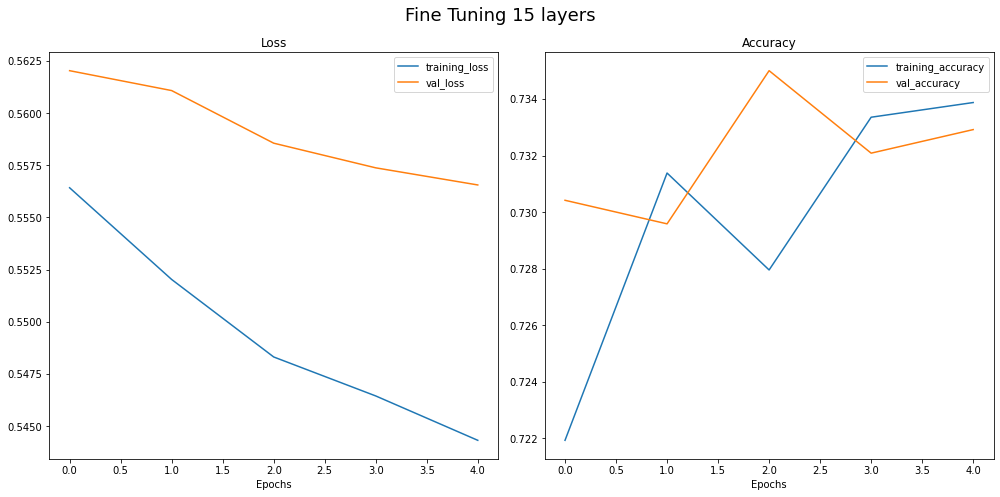

In [98]:
ut.Visualize.plot_loss_curves([history_8_3],["Fine Tuning 15 layers"])

In [101]:
callbacks2 = [tf.keras.callbacks.EarlyStopping(monitor='loss',patience=2)]

In [100]:
train_datagen2 = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis
valid_datagen2 = ImageDataGenerator(rescale=1./255)

train_data_299_aug = train_datagen2.flow_from_directory(directory=train_dir_RWF_big,
                                                                            target_size=(299,299),
                                                                            class_mode="binary", 
                                                                            batch_size=32) 
test_data_299_aug = valid_datagen2.flow_from_directory(directory=val_dir_RWF_big,
                                                                           target_size=(299,299),
                                                                           class_mode="binary")

Found 79997 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [103]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss',patience=2)]
base_model_9 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=(299,299,3))
base_model_9.trainable = False
pool = GlobalAveragePooling2D()(base_model_9.output)
output = Dense(2, activation = 'softmax')(pool)
model_9 = Model(inputs = base_model_9.input, outputs= output)
model_9.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = LR,momentum=0.5),metrics=['accuracy'])

c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [104]:
history_9 = model_9.fit(train_data_299_aug,epochs=5,callbacks=callbacks,validation_data=test_data_299_aug,verbose=1)
# Unfreeze all of the layers in the base model
base_model_8.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model_8.layers[:-5]:
  layer.trainable = False

model_9.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = 0.5*LR,momentum=0.5),metrics=['accuracy'])
history_9_2 = model_9.fit(train_data_299_aug,epochs=10,callbacks=callbacks,validation_data=test_data_299_aug,verbose=1)

# Refreeze every layer except for the last 20
for layer in base_model_8.layers[:-20]:
  layer.trainable = False

model_9.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = 0.1*LR,momentum=0.5),metrics=['accuracy'])
history_9_3 = model_9.fit(train_data_299_aug,epochs=15,callbacks=callbacks,validation_data=test_data_299_aug,verbose=1)



Epoch 1/5
2500/2500 [==============================] - 1789s 714ms/step - loss: 0.6562 - accuracy: 0.6131 - val_loss: 0.6397 - val_accuracy: 0.6277
Epoch 2/5
2500/2500 [==============================] - 1744s 698ms/step - loss: 0.5946 - accuracy: 0.6831 - val_loss: 0.6078 - val_accuracy: 0.6589
Epoch 3/5
2500/2500 [==============================] - 1739s 696ms/step - loss: 0.5713 - accuracy: 0.7016 - val_loss: 0.5971 - val_accuracy: 0.6721
Epoch 4/5
2500/2500 [==============================] - 1731s 692ms/step - loss: 0.5570 - accuracy: 0.7123 - val_loss: 0.5919 - val_accuracy: 0.6793
Epoch 5/5
2500/2500 [==============================] - 1726s 690ms/step - loss: 0.5470 - accuracy: 0.7198 - val_loss: 0.5878 - val_accuracy: 0.6874


c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
2500/2500 [==============================] - 1738s 694ms/step - loss: 0.5408 - accuracy: 0.7240 - val_loss: 0.5875 - val_accuracy: 0.6866
Epoch 2/10
2500/2500 [==============================] - 2719s 1s/step - loss: 0.5364 - accuracy: 0.7261 - val_loss: 0.5861 - val_accuracy: 0.6901
Epoch 3/10
2500/2500 [==============================] - 2021s 808ms/step - loss: 0.5350 - accuracy: 0.7276 - val_loss: 0.5841 - val_accuracy: 0.6938
Epoch 4/10
2500/2500 [==============================] - 1942s 777ms/step - loss: 0.5305 - accuracy: 0.7299 - val_loss: 0.5839 - val_accuracy: 0.6934
Epoch 5/10
2500/2500 [==============================] - 1891s 756ms/step - loss: 0.5279 - accuracy: 0.7338 - val_loss: 0.5835 - val_accuracy: 0.6929
Epoch 6/10
2500/2500 [==============================] - 1690s 676ms/step - loss: 0.5254 - accuracy: 0.7351 - val_loss: 0.5803 - val_accuracy: 0.6993
Epoch 7/10
2500/2500 [==============================] - 1678s 671ms/step - loss: 0.5233 - accuracy: 0.7364 - 

In [105]:
base_model_10 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=(299,299,3))
base_model_10.trainable = False
pool = GlobalAveragePooling2D()(base_model_10.output)
output = Dense(2, activation = 'softmax')(pool)
model_10 = Model(inputs = base_model_10.input, outputs= output)
model_10.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = LR,momentum=0.2),metrics=['accuracy'])
history_10 = model_10.fit(train_data_299_aug,epochs=5,callbacks=callbacks,validation_data=test_data_299_aug,verbose=1)

base_model_11 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=(299,299,3))
base_model_11.trainable = False
pool = GlobalAveragePooling2D()(base_model_11.output)
output = Dense(2, activation = 'softmax')(pool)
model_11 = Model(inputs = base_model_11.input, outputs= output)
model_11.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = LR,momentum=0.5),metrics=['accuracy'])
history_11 = model_11.fit(train_data_299_aug,epochs=5,callbacks=callbacks,validation_data=test_data_299_aug,verbose=1)

base_model_12 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=(299,299,3))
base_model_12.trainable = False
pool = GlobalAveragePooling2D()(base_model_12.output)
output = Dense(2, activation = 'softmax')(pool)
model_12 = Model(inputs = base_model_12.input, outputs= output)
model_12.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = LR,momentum=0.9),metrics=['accuracy'])
history_12 = model_12.fit(train_data_299_aug,epochs=5,callbacks=callbacks,validation_data=test_data_299_aug,verbose=1)


Epoch 1/5
2500/2500 [==============================] - 1892s 755ms/step - loss: 0.6653 - accuracy: 0.6058 - val_loss: 0.6051 - val_accuracy: 0.6798
Epoch 2/5
2500/2500 [==============================] - 2220s 888ms/step - loss: 0.6166 - accuracy: 0.6664 - val_loss: 0.5868 - val_accuracy: 0.6996
Epoch 3/5
2500/2500 [==============================] - 2048s 819ms/step - loss: 0.5943 - accuracy: 0.6860 - val_loss: 0.5796 - val_accuracy: 0.7106
Epoch 4/5
2500/2500 [==============================] - 2009s 804ms/step - loss: 0.5797 - accuracy: 0.6984 - val_loss: 0.5756 - val_accuracy: 0.7143
Epoch 5/5
2500/2500 [==============================] - 2050s 820ms/step - loss: 0.5700 - accuracy: 0.7042 - val_loss: 0.5753 - val_accuracy: 0.7135
Epoch 1/5
2500/2500 [==============================] - 1980s 789ms/step - loss: 0.6630 - accuracy: 0.5981 - val_loss: 0.6097 - val_accuracy: 0.6859
Epoch 2/5
2500/2500 [==============================] - 1929s 772ms/step - loss: 0.6033 - accuracy: 0.6720 - val_

In [118]:
importlib.reload(ut)

<module 'utilities' from 'c:\\Users\\tdiam\\Desktop\\thesis\\dataset\\utilities.py'>

In [124]:
history_10.params

{'verbose': 1, 'epochs': 5, 'steps': 2500}

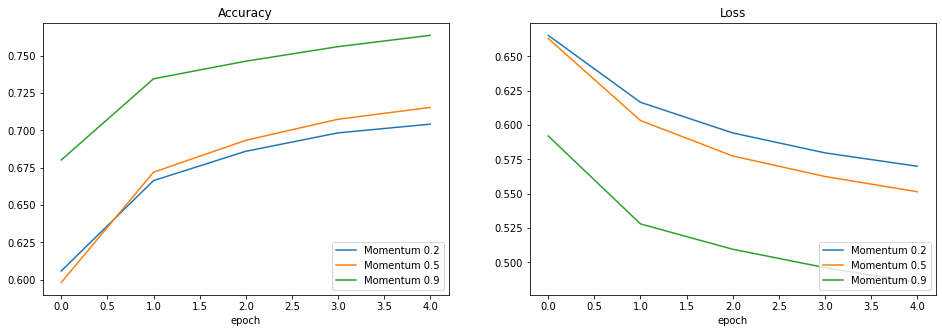

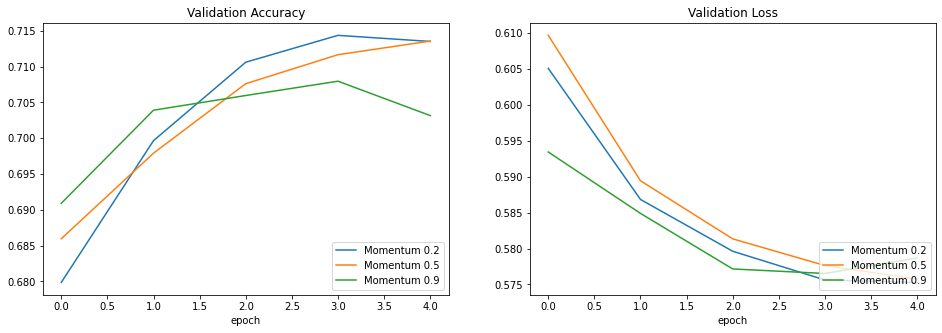

In [125]:
histories = [history_10,history_11,history_12]
legends = ["Momentum 0.2","Momentum 0.5","Momentum 0.9"]
ut.Visualize.compare_histories(histories,legends,figsz=(16,5))

In [126]:
base_model_13 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=(299,299,3))
base_model_13.trainable = False
pool = GlobalAveragePooling2D()(base_model_13.output)
output = Dense(2, activation = 'softmax')(pool)
model_13 = Model(inputs = base_model_13.input, outputs= output)
model_13.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = LR,momentum=0.9),metrics=['accuracy'])
history_13 = model_13.fit(train_data_299_aug,epochs=2,callbacks=callbacks,validation_data=test_data_299_aug,verbose=1)

model_13.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = LR,momentum=0.2),metrics=['accuracy'])
history_13_2 = model_13.fit(train_data_299_aug,epochs=2,callbacks=callbacks,validation_data=test_data_299_aug,verbose=1)

c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/2
2500/2500 [==============================] - 1896s 757ms/step - loss: 0.5923 - accuracy: 0.6780 - val_loss: 0.5863 - val_accuracy: 0.6977
Epoch 2/2
2500/2500 [==============================] - 1828s 731ms/step - loss: 0.5334 - accuracy: 0.7300 - val_loss: 0.5931 - val_accuracy: 0.6876
Epoch 1/2
2500/2500 [==============================] - 1849s 738ms/step - loss: 0.5161 - accuracy: 0.7435 - val_loss: 0.5799 - val_accuracy: 0.7067
Epoch 2/2
2500/2500 [==============================] - 1870s 748ms/step - loss: 0.5136 - accuracy: 0.7426 - val_loss: 0.5806 - val_accuracy: 0.7046


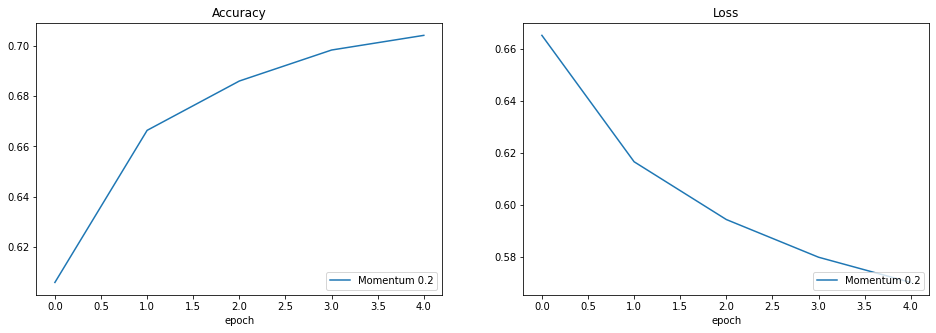

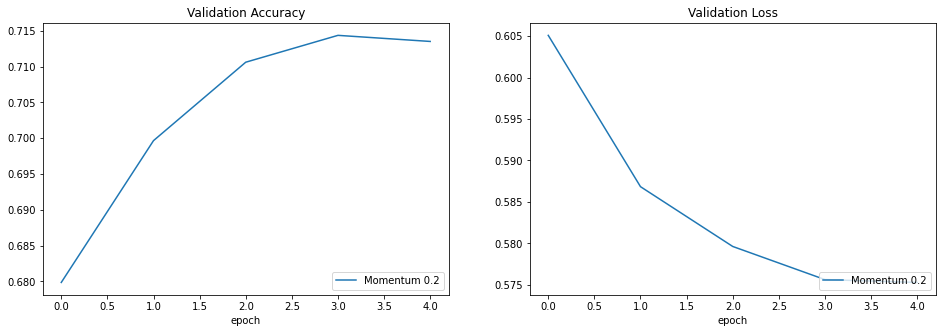

In [127]:
histories = [history_10]
legends = ["Momentum 0.2"]
ut.Visualize.compare_histories(histories,legends,figsz=(16,5))